In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pydub.silence import split_on_silence
import wave
import os

In [2]:
# shows the sound waves
def visualize(path: str,sil=None):
    raw = wave.open(path)
    signal = raw.readframes(-1)
    signal = np.frombuffer(signal, dtype ="int16")
    f_rate = raw.getframerate()
    time = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
    plt.figure(1)
    plt.title("Sound Wave")
    plt.xlabel("Time")
    plt.plot(time, signal)
    if sil:
        for i in sil:
            plt.axvline(x=i[0], color='red')
            plt.axvline(x=i[1], color='red')
    plt.show()

In [3]:
google_drive = False
src_directory_path = "./pipeline/1-dataset_wav/"
destination_directory = './pipeline/2-silence_removed_dataset_wav/'
if google_drive:
    src_directory_path = '/content/drive/MyDrive/thesis_models/' + src_directory_path
    destination_directory = '/content/drive/MyDrive/thesis_models/' + destination_directory

In [4]:
if not os.path.exists(destination_directory):
    os.makedirs(destination_directory)
    print(f"Directory '{destination_directory}' created successfully.")
else:
    print(f"Directory '{destination_directory}' already exists.")

Directory './pipeline/2-silence_removed_dataset_wav/' already exists.


In [5]:
from pydub import AudioSegment
from pydub.silence import split_on_silence
import os

In [12]:
file_names = os.listdir(src_directory_path)
file_names

['L_2.wav',
 'L_1.wav',
 'Renad_2.wav',
 'Reem_2.wav',
 'A_1.wav',
 'S_1.wav',
 'Sherif_1.wav',
 'O_2.wav',
 'Renad_1.wav',
 'Y_2.wav',
 'S_2.wav',
 'A_2.wav',
 'Sherif_2.wav',
 'Reem_1.wav',
 'O_1.wav',
 'Y_1.wav']

In [11]:
audio_format = "wav"
for file_path in file_names:
    file_path = src_directory_path + file_path
    file_name = file_path.split('/')[-1]
    sound = AudioSegment.from_file(file_path, format = audio_format)
    audio_chunks = split_on_silence(sound
                                ,min_silence_len = 1000
                                ,silence_thresh = -50
                                ,keep_silence = 50
                            )

    combined = AudioSegment.empty()
    for chunk in audio_chunks:
        combined += chunk
    combined.export(f'{destination_directory}{file_name}', format = audio_format)

In [8]:
combined

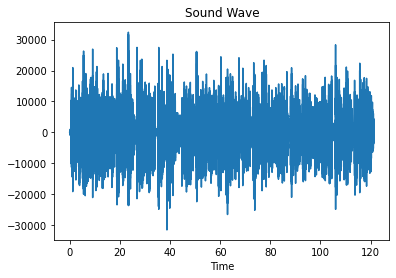

In [9]:
visualize(file_path)

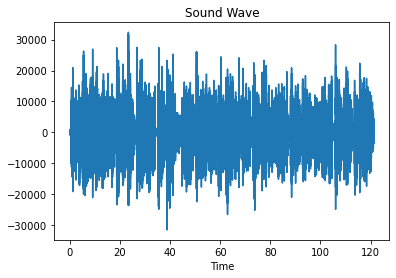

In [10]:
visualize(f'{destination_directory}/{file_name}')